### Clean titanic dataset

In [17]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

from utils.outliers import outliners_filter

In [18]:
# Load CSV
df = pd.read_csv("data/data_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

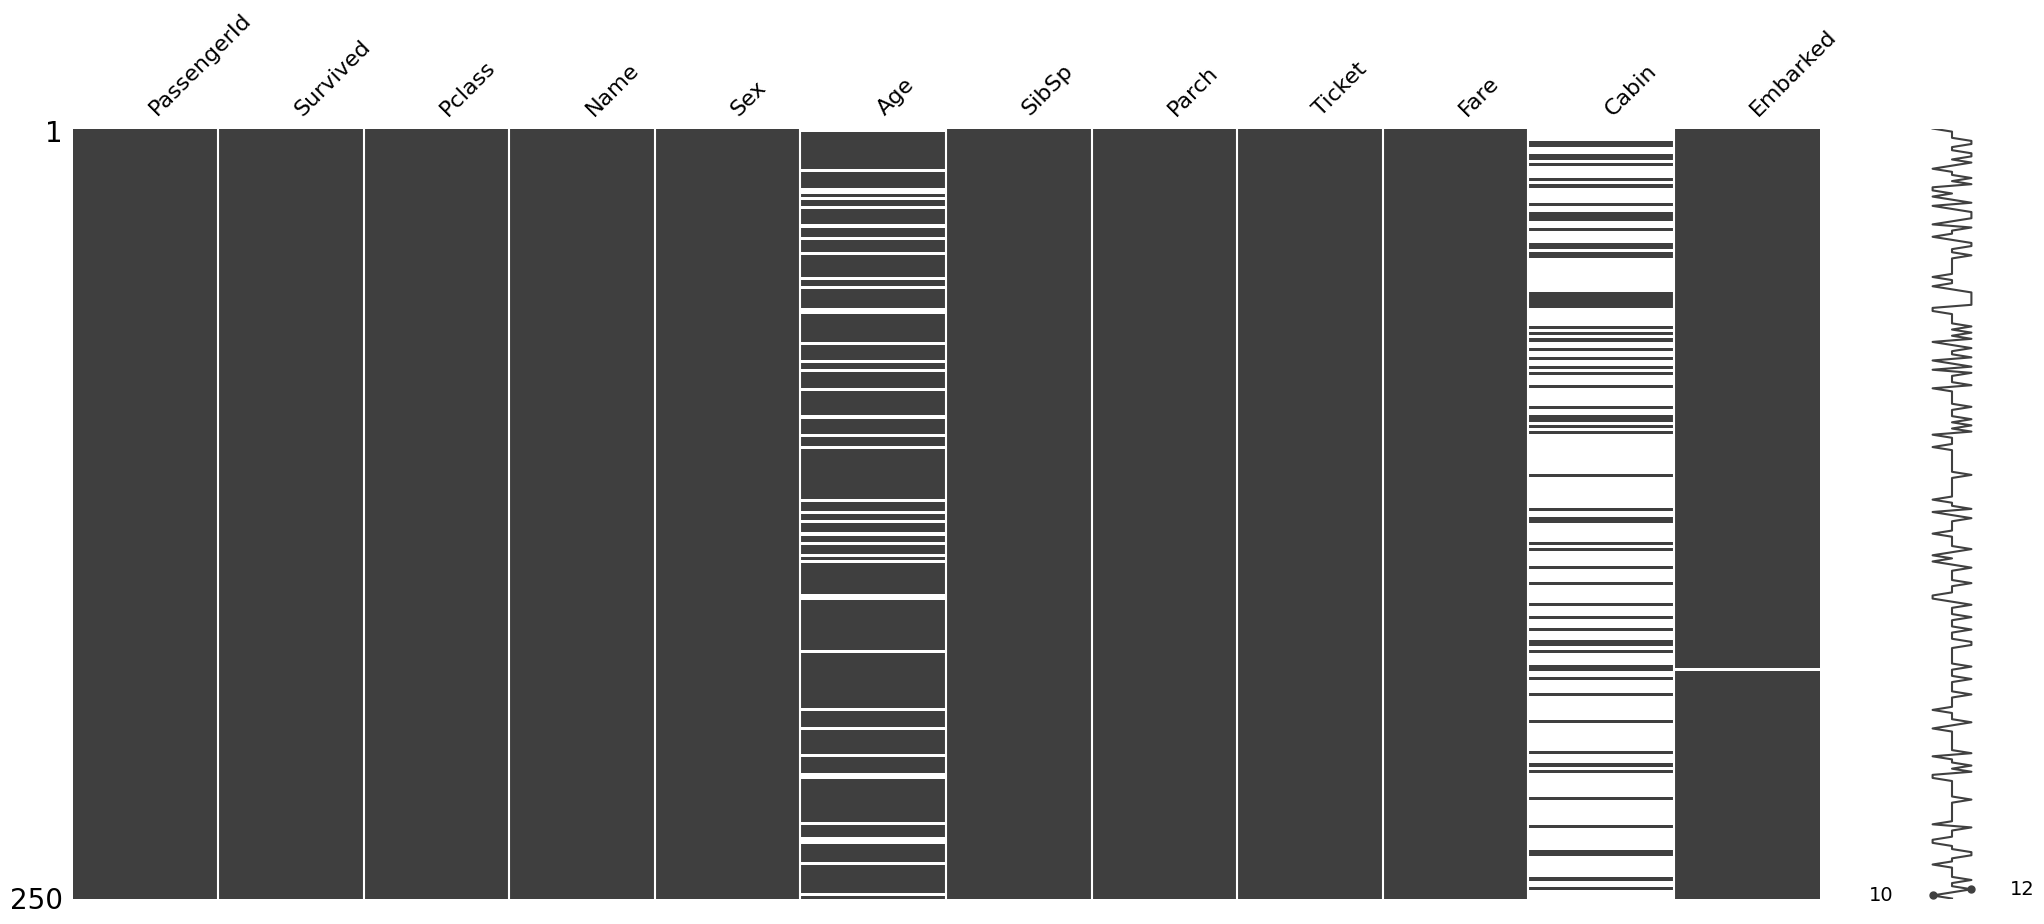

In [19]:
# Analyse current dataset
%matplotlib inline
msno.matrix(df.sample(250))

In [20]:
# Remove non used columns
# - PassengerId : no need
# - Name : not RGPD friendly
# - Ticket : not relevant
# - Cabin : insufficient
# - Sex : discriminent
df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin', 'Sex'], inplace=True)
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C


In [21]:
# Update age column to populate missing data with mean value
df.fillna({"Age": df["Age"].mean()}, inplace=True)

<Axes: >

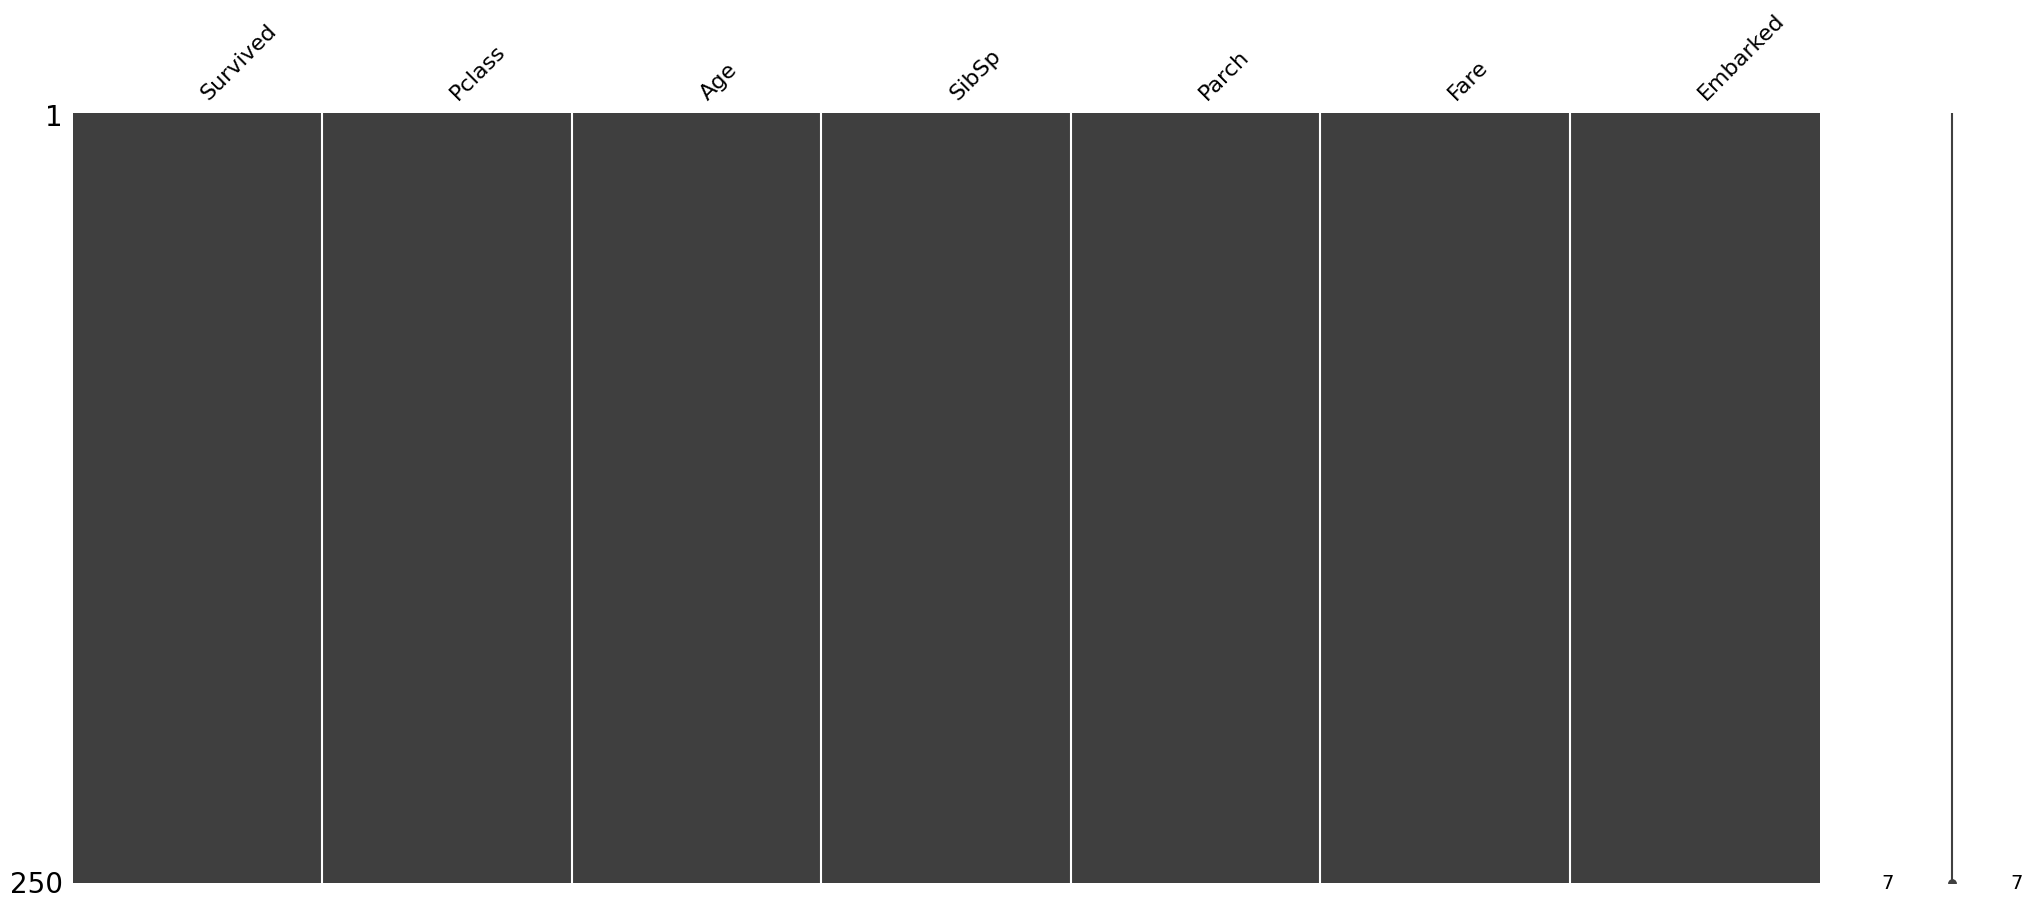

In [22]:
# Check result
%matplotlib inline
msno.matrix(df.sample(250))

In [23]:
# Transform category to numeric
df = pd.get_dummies(df, columns=["Embarked"])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,True


BOXPLOT : age


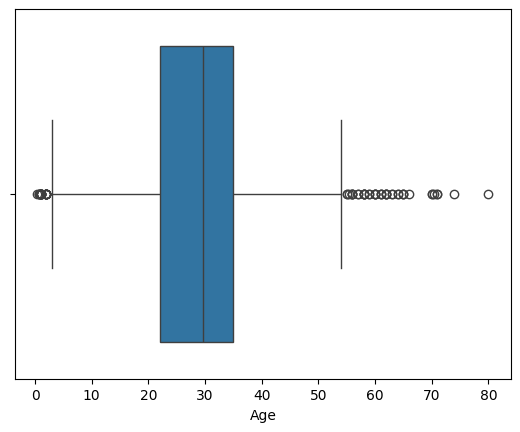

In [24]:
# Verify column outliners
print("BOXPLOT : age")
sns.boxplot(x=df["Age"])
plt.show()

UPDATED BOXPLOT : Age


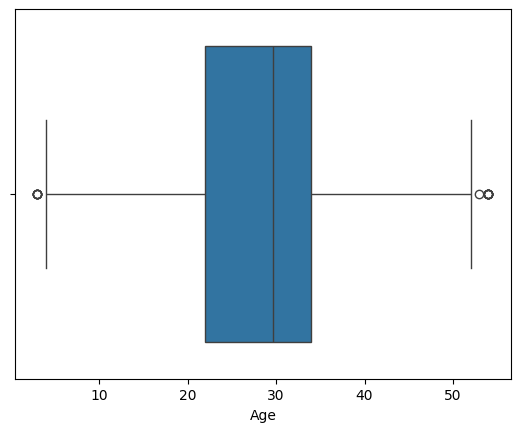

In [25]:
# Reformat age outliners
df2 = outliners_filter(df, "Age")
df = df2
print("UPDATED BOXPLOT : Age")
sns.boxplot(x=df["Age"])
plt.show()

In [26]:
### SAVE FILTERED CSV
df.to_csv("data/update_titanic.csv", index=False)